<a href="https://colab.research.google.com/github/Satwikram/Tensorflow-Notebooks/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
x_train.shape[1:]

(32, 32, 3)

Image Normalization

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [38]:
x_train[0].shape

(32, 32, 3)

Plotting the image

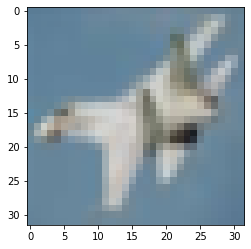

In [39]:
plt.imshow(x_test[10])

Building CNN

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:]))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))

In [0]:
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))

In [0]:
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))

In [0]:
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))

Flatten

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [0]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

Compiling the model

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)         

In [87]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2525 - sparse_categorical_accuracy: 0.5494
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0360 - sparse_categorical_accuracy: 0.6325
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9142 - sparse_categorical_accuracy: 0.6786
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8322 - sparse_categorical_accuracy: 0.7071
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7789 - sparse_categorical_accuracy: 0.7269
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7234 - sparse_categorical_accuracy: 0.7459
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6819 - sparse_categorical_accuracy: 0.7598
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6344 - sparse_categorical_accuracy: 0.7763
Epoch 9/10
1563/

In [88]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.8581 - sparse_categorical_accuracy: 0.7166


In [89]:
accuracy * 100


71.66000008583069